# Mid Bootcamp Project 😵‍💫 

**Housing Regret-ssion - EDA and Modeling**

--------

**Objective:** Explore housing trends and develop a model to predict housing prices

* Students' names: **Yamila Rodriguez Teran** + **Simon Stewart**
* IrronHack mid-bootcamp project: part time
* Project review date/time: 19/11/21
* Instructors: **Sian Davies**  +  **Ángela Sánchez** (TA)

## assemble libraries

In [117]:
# importing the necesary packages
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [118]:
# opening the file
df = pd.read_excel('/Users/AFROARC/Documents/GitHub/mid_bootcamp_project/datasets/regression_data.xls')

In [119]:
# getting information from the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [120]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## EDA

### A quick data check & cleanup

We saw that we have no nulls so we will look at all our numeric data to get an overall idea

In [121]:
# describing numericals
df.describe(include=np.number)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


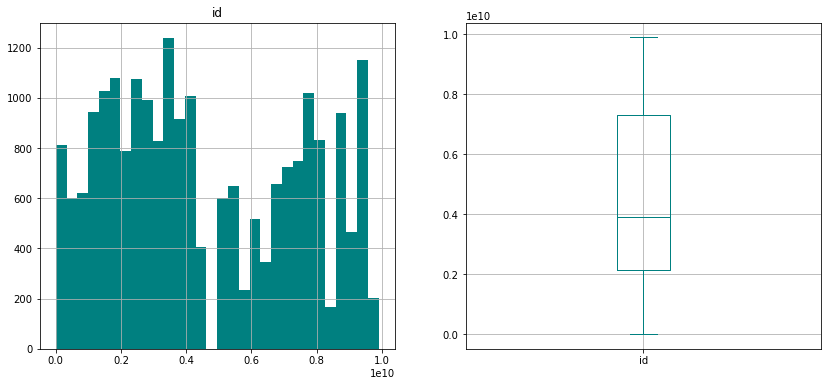

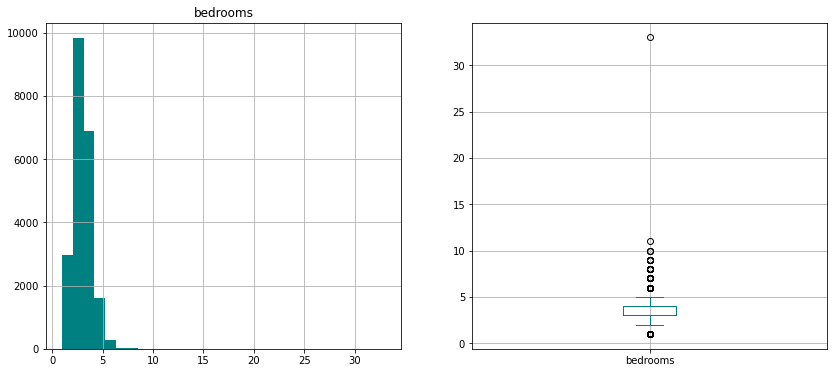

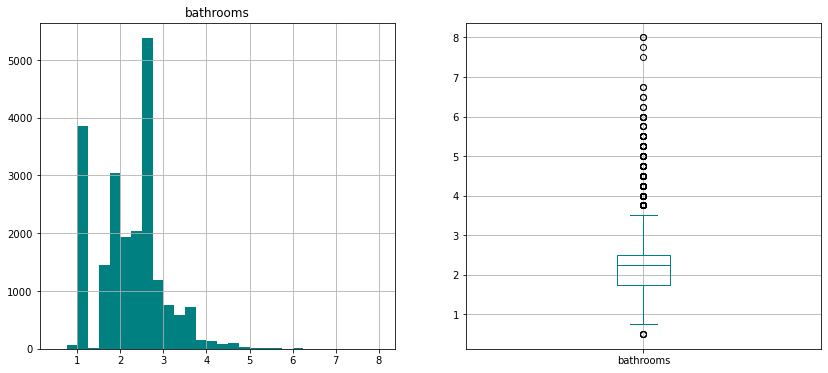

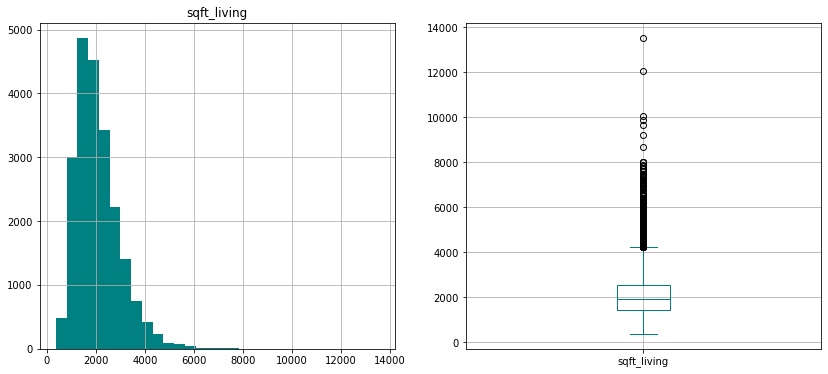

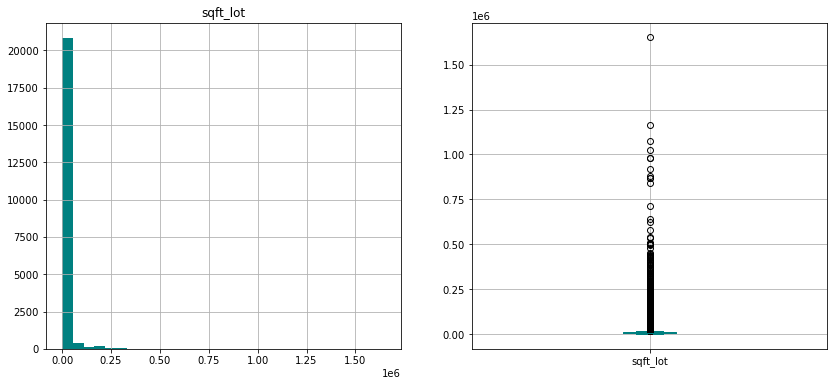

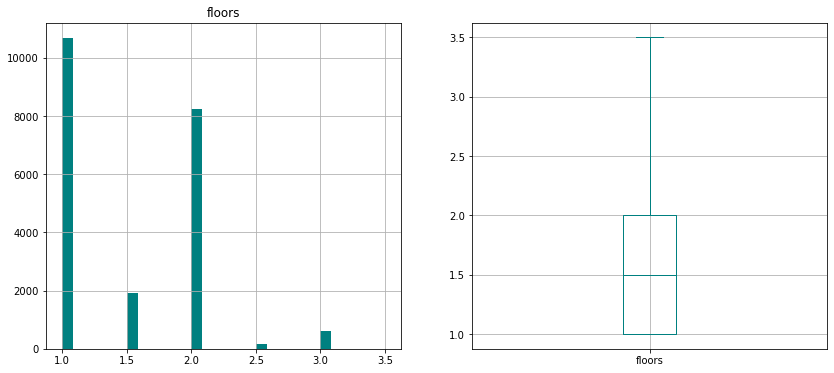

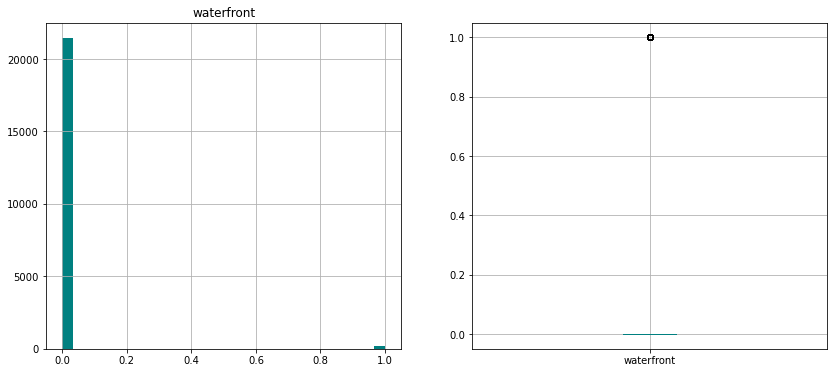

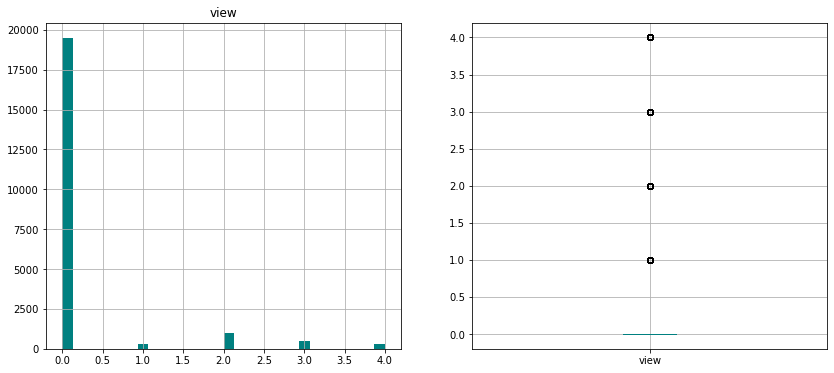

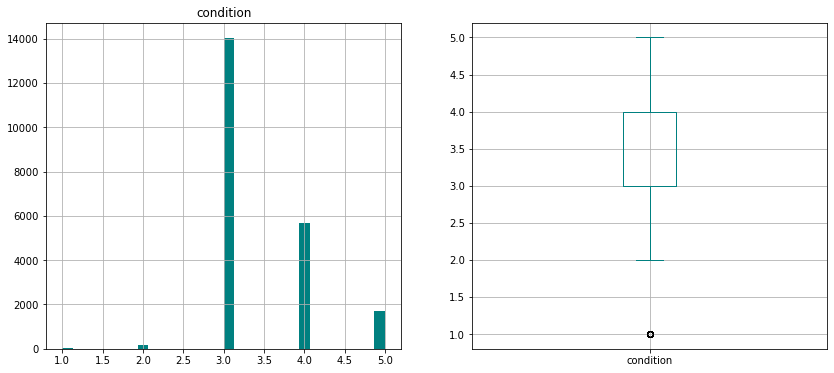

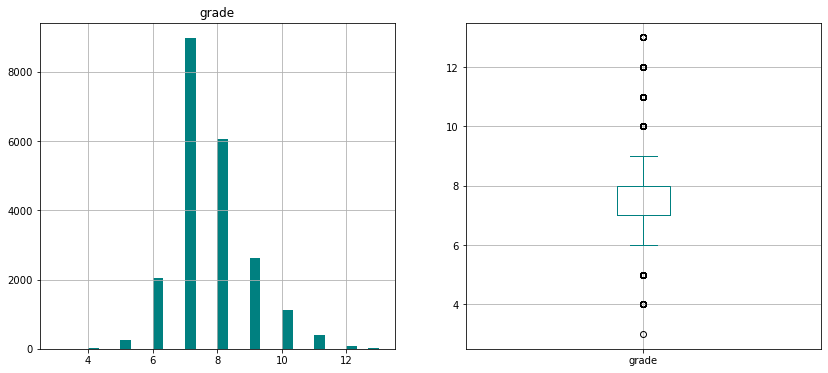

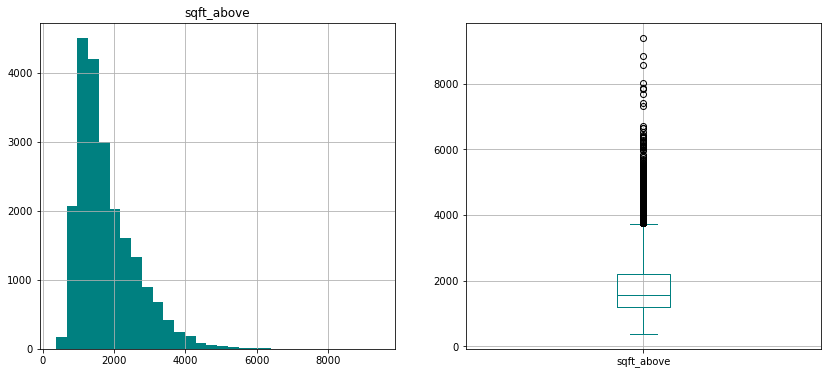

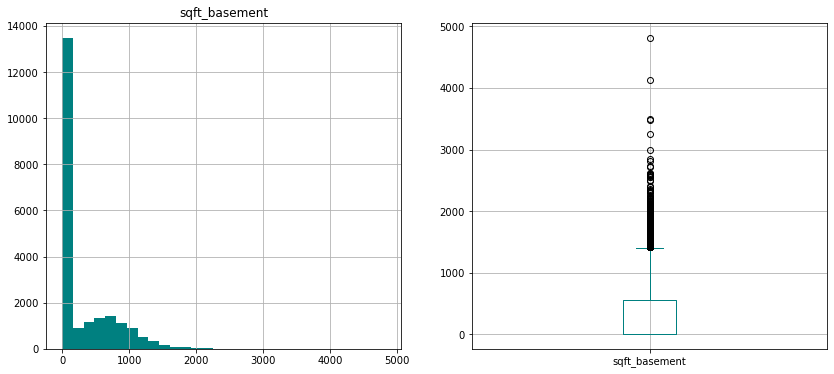

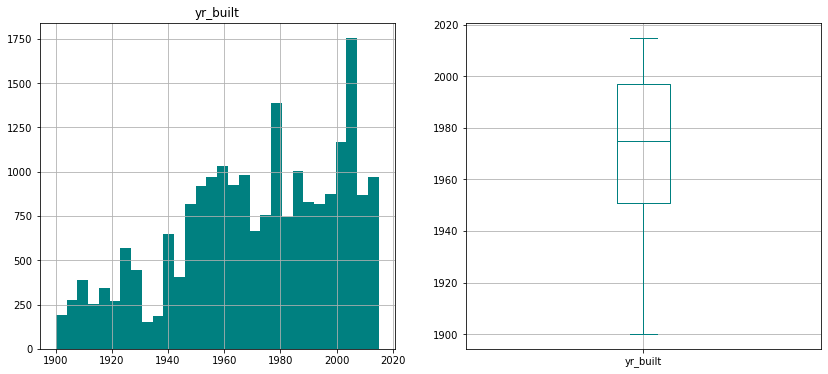

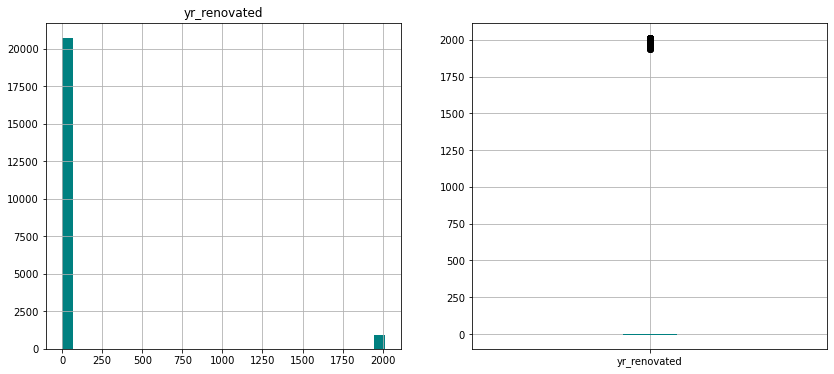

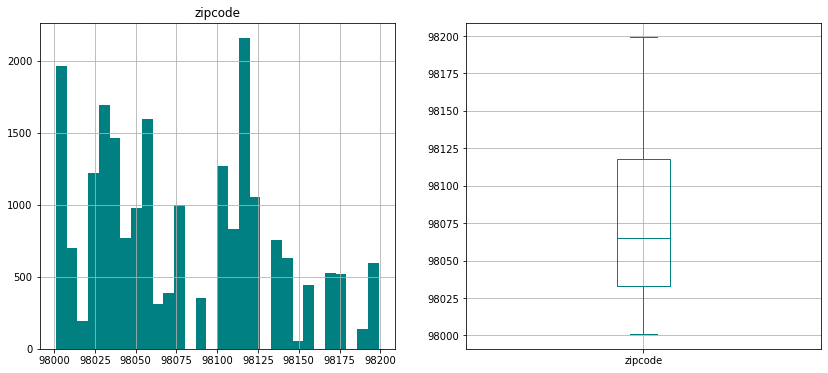

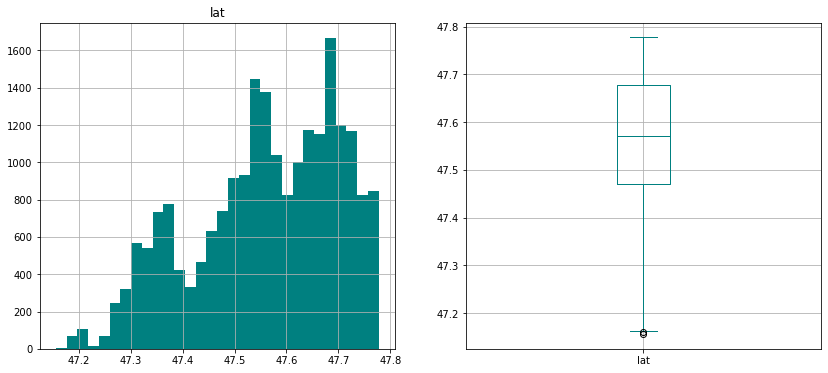

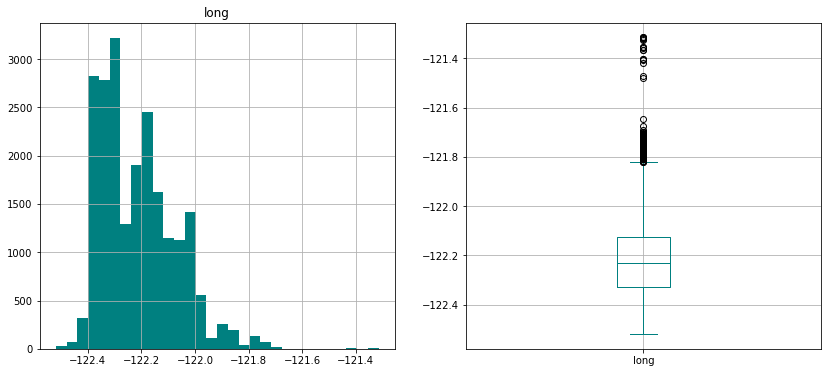

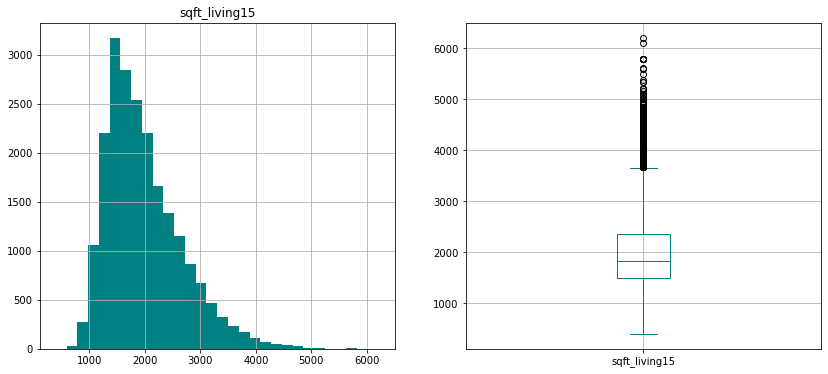

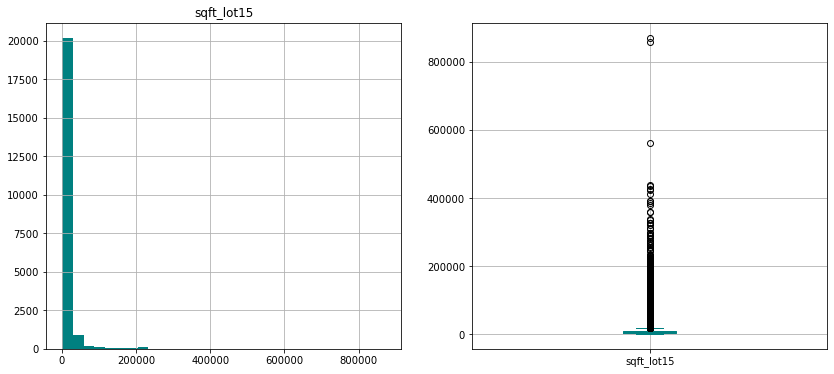

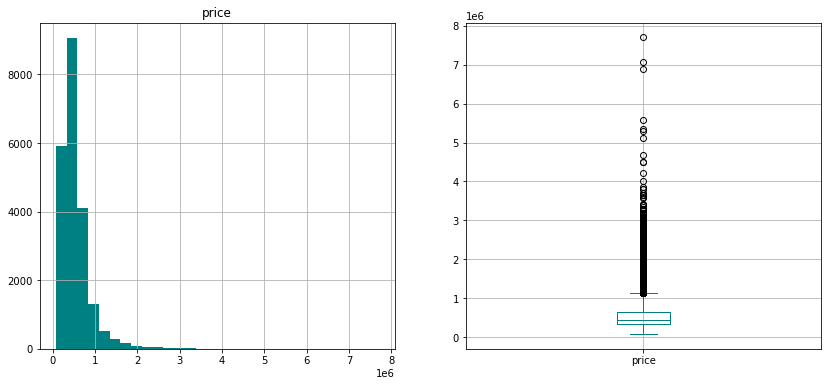

In [122]:
# plotting numericals
numdf = df.select_dtypes(include = np.number)
for column in numdf.columns:
    # 2 charts
    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    # histogram
    numdf[column].hist(bins = 30, ax = axes[0], color = 'teal')
    axes[0].set_title(column)
    # boxplot 
    numdf.boxplot(column = column, ax = axes[1], color = 'teal')
    plt.show()

#### ID

We will now check some of the columns to seek for 'weird' numbers

In [123]:
# checking id
df.id.value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [124]:
# we have some duplicated ID's, checking one for reference
df.loc[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


 Apparently in the duplicated ID's the price changes with the date so we are keeping it for better accuracy of the model but we are dropping the column anyway

In [125]:
df.drop(['id'], axis = 1, inplace = True) 

#### Bedrooms

In [126]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [127]:
# 33 bedrooms? might be an error
# check the row
df.loc[df['bedrooms'] == 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


Since we are not sure if it's a typo and leaving it will make a big difference on our data we decided to drop it

In [128]:
df.drop(df.index[15856])

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


#### Bathrooms

In [129]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### Floors

In [130]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

#### Waterfront

In [131]:
df.waterfront.value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

#### SQFT Living & SQFT Living 15

In [132]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [133]:
df.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

For better accuracy and less data we decided to drop `sqft_living` & `sqft_lot`, giving that we have updated sizes on another column (`sqft_living15` & `sqft_lot15`)

In [134]:
df.drop(['sqft_living', 'sqft_lot'], axis = 1, inplace = True) 

In [135]:
# reindexing
df.reset_index(drop=True, inplace=True)

In [136]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Years Built & Renovated

In [137]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

We won't be able to work with the zeroes in the `yr_renovated` and they are a majority so we decided to drop it

In [138]:
df.drop(['yr_renovated'], axis = 1, inplace = True)

The year built is actually a date, we decided to turn it into a regular number by obtaining the age of the house (based on 2015 as end date)

In [139]:
# creating new age column
dfnew = pd.DataFrame(2015 - df["yr_built"])
dfnew

,yr_built
0,60
1,64
2,82
3,50
4,28
...,...
21592,6
21593,1
21594,6
21595,11


In [140]:
# renaming column in new dataframe
dfnew.rename(columns={'yr_built': 'house_age'}, inplace=True) 
# joining dataframes
df = pd.concat([df, dfnew], axis=1)
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900,60
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000,64
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000,82
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000,50
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000,28


In [141]:
# droping the column
df.drop(['yr_built'], axis = 1, inplace = True) 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   floors         21597 non-null  float64       
 4   waterfront     21597 non-null  int64         
 5   view           21597 non-null  int64         
 6   condition      21597 non-null  int64         
 7   grade          21597 non-null  int64         
 8   sqft_above     21597 non-null  int64         
 9   sqft_basement  21597 non-null  int64         
 10  zipcode        21597 non-null  int64         
 11  lat            21597 non-null  float64       
 12  long           21597 non-null  float64       
 13  sqft_living15  21597 non-null  int64         
 14  sqft_lot15     21597 non-null  int64         
 15  price          2159

#### LAT, LONG, ZIPCODE

Too many columns for the same information, we will drop `lat` and `long` and keep `zipcode`.

In [143]:
#df = df.drop(['lat', 'long'], axis=1)

#### DATE

We don't consider it really necessary for our predictions and turning it into numbers doesn't seem really useful, so we are dropping the column

In [144]:
df.drop(['date'], axis = 1, inplace = True) 

In [145]:
# reindexing
df.reset_index(drop=True, inplace=True)

#### Grade

In [146]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

According to google, the grade 1-3:  'Falls short of minimum building standards. Normally cabin or inferior structure.'


In [147]:
# checking and removing the grade
df.loc[df['grade'] == 3]

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
3220,1,0.75,1.0,0,0,5,3,520,0,98022,47.2082,-121.995,1340,12233,262000,95


In [148]:
df.drop(df.index[3220])

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,3,1.00,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,64
2,2,1.00,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,82
3,4,3.00,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,50
4,3,2.00,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,360000,6
21593,4,2.50,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,400000,1
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,402101,6
21595,3,2.50,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,400000,11


In [149]:
# reindexing
df.reset_index(drop=True, inplace=True)

#### Categorical columns

We decided to turn some columns into categoricals to be able to manage them differently from the rest of the data `bedrooms`, `bathrooms`, `floors`, `waterfront`, `view`, `condition` and `grade`. 

In [150]:
# changing the selected columns to object type
df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']] = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']].astype(object)

In [151]:
# checking that the type change is done
df.dtypes

bedrooms          object
bathrooms         object
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
house_age          int64
dtype: object

## Correlations

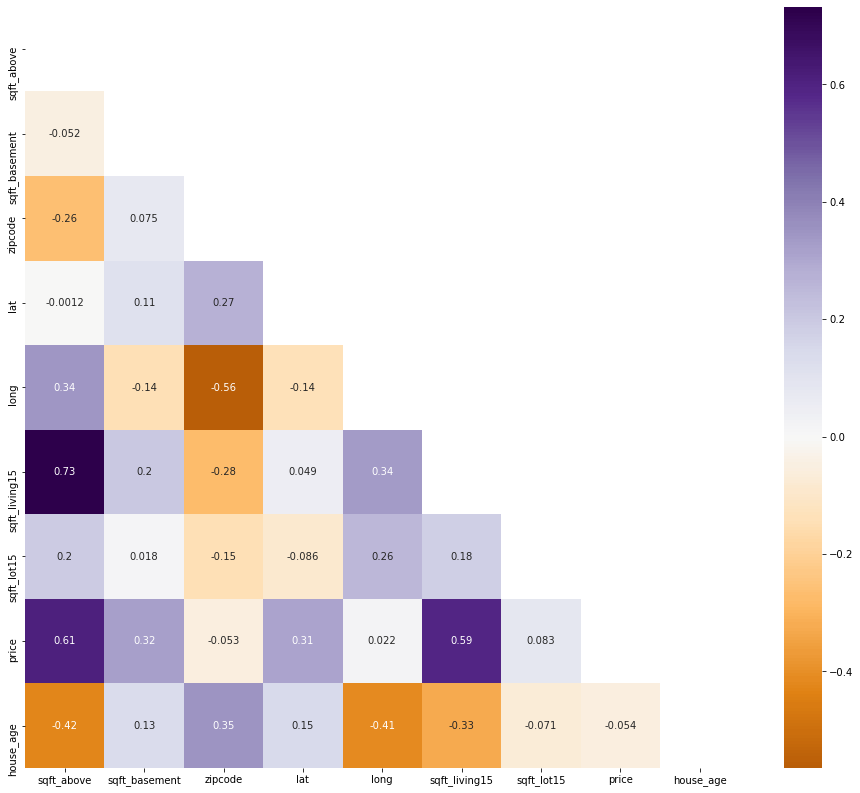

In [229]:
# checking correlations
corr_matrix = df.corr()
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(df.corr(),
           annot = True,
           center = 0,
           mask = mask,
           cmap = 'PuOr')
plt.show();

High correlations between features: first model might not be as accurate, maybe drop some features in the next try but for now we will use them all

#### Quick scatter check of columns for future comparison

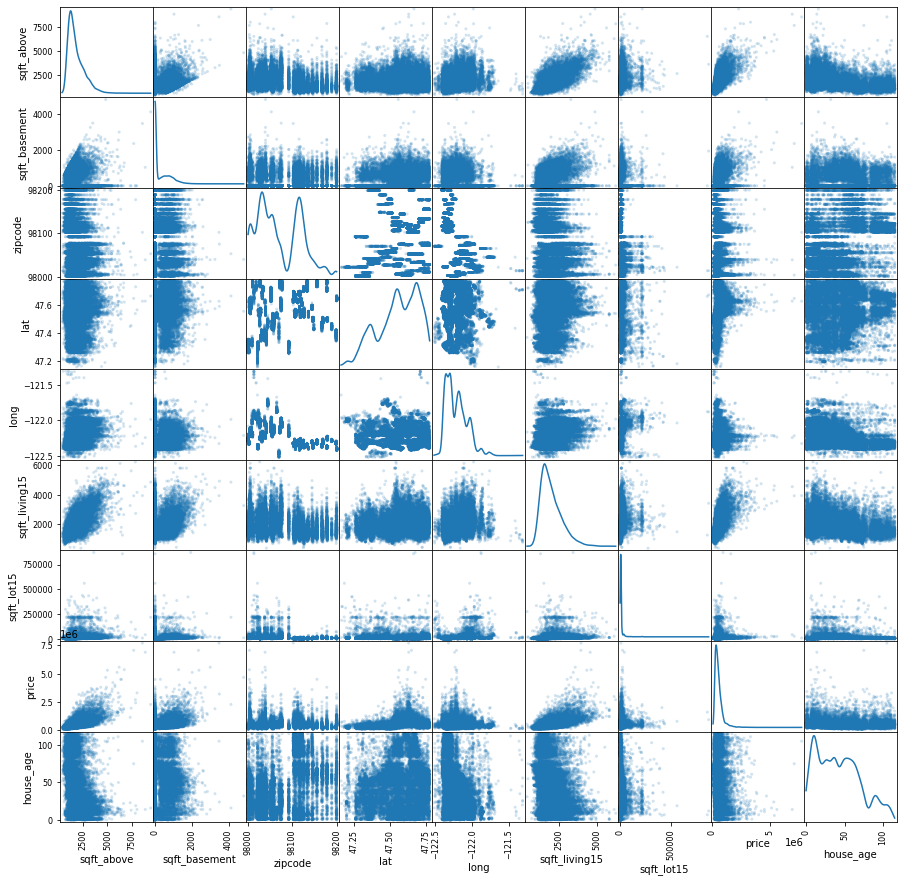

In [230]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15,15), diagonal="kde");

In [231]:
#copying and saving the cleaned dataframe to be able to use it later
cleaneddf = df.copy()
df.to_csv("cleaned_regression_data.csv", index=False)

## Modelling

In [232]:
# getting the packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np

### First Try: without data processing. Linear regression & KNN

#### Defining X & y

In [233]:
X = cleaneddf.drop(columns=['price'])

In [234]:
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,3,1.0,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,64
2,2,1.0,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82
3,4,3.0,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,50
4,3,2.0,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.5,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,6
21593,4,2.5,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,1
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,6
21595,3,2.5,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,11


In [235]:
y = cleaneddf['price']

In [236]:
X.shape

(21597, 15)

In [237]:
y.shape

(21597,)

#### Split data intro train & test

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear Regression

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [240]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [241]:
R2 = r2_score(y_test,predictions)
R2

0.7030667641494436

In [242]:
MSE = mean_squared_error(y_test,predictions)
MSE

40504034052.92624

In [243]:
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

201256.14041048844

In [244]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predictions)
MAE

125367.09614490259

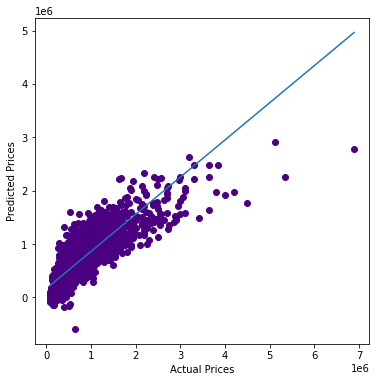

In [245]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y_test,predictions, color="indigo")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

First approach: with poorly cleaned data and no preprocessing we managed an accuracy of 65% and a mean absolute error of $139.494, we will try to improve the accuracy now by processing the data and maybe do some more cleaning and trying different models

#### KNN

In [246]:
from sklearn.neighbors import KNeighborsRegressor

In [247]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)

In [248]:
R2 = r2_score(y_test,predictions)
R2

0.5453552128255522

In [249]:
MSE = mean_squared_error(y_test,predictions)
MSE

62017132871.46912

In [250]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

249032.39321716587

In [251]:
MAE = mean_absolute_error(y_test, predictions)
MAE

150049.77274568815

KNN is not the **fittest** model so far, linear regression is more accurate so far

### Second Try: StandardScaler & OneHotEncoder. Linear regression & KNN 

#### StandardScaler

In [252]:
# getting the numerical columns
numericals = df._get_numeric_data()
Xnum = numericals.drop(columns=['price'])

In [253]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.73525069, -0.65903091,  1.86964543, ..., -0.94367562,
        -0.26062671,  0.54467809],
       [ 0.46077619,  0.24460216,  0.87921029, ..., -0.43288674,
        -0.18769961,  0.68085037],
       [-1.23057495, -0.65903091, -0.93347288, ...,  1.07029196,
        -0.17219022,  1.29362563],
       ...,
       [-0.92854796, -0.65903091,  1.23427195, ..., -1.41068259,
        -0.39419807, -1.29364769],
       [-0.22784535, -0.65903091, -0.95216033, ..., -0.84151784,
        -0.42059702, -1.12343234],
       [-0.92854796, -0.65903091,  1.23427195, ..., -1.41068259,
        -0.41803046, -1.25960462]])

#### GetDummies

In [254]:
# using categorical columns
Xcat = df.select_dtypes(include = object)

In [255]:
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### X & y

In [256]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [257]:
y = df['price']

In [258]:
X.shape

(21597, 71)

In [259]:
y.shape

(21597,)

#### Split data intro train and test


In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear Regression

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [262]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [263]:
R2 = r2_score(y_test,predictions)
R2

0.7394211281070464

In [264]:
MSE = mean_squared_error(y_test,predictions)
MSE

35545012232.77434

In [265]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

188533.84903718042

In [266]:
MAE = mean_absolute_error(y_test, predictions)
MAE

117724.25608159661

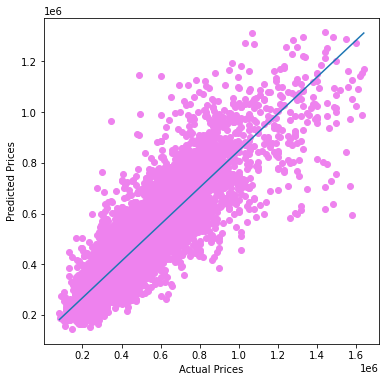

In [306]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y_test,predictions, color="violet")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

We didn't get much of a difference but still we managed to improve the model a little by getting now a 69% accuracy and a mean error of $132,342, we are getting there.

#### KNN

In [268]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)

In [269]:
R2 = r2_score(y_test,predictions)
R2

0.7435662548436519

In [270]:
MSE = mean_squared_error(y_test,predictions)
MSE

34979584270.45062

In [271]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

187028.29804724906

In [272]:
MAE = mean_absolute_error(y_test, predictions)
MAE

94059.00478450439

Our KNN model is worst than the linear one but it has improved from the previous run that gave us a 54%

### Third Try: without outliers. Linear regression & KNN 

With the aim of trying to get a more accurate prediction we decided to drop outliers

In [273]:
# found this nice little code with the help of our friend google
def get_outliers(df, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = df[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = df[(df[col] > mean + 3*sd) | (df[col]  < mean  - 3*sd)].index
        # and add those values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

In [274]:
df_outliers = get_outliers(df, df)

In [275]:
df_outliers

[5,
 8201,
 10,
 15,
 16399,
 16404,
 21,
 8215,
 8217,
 16416,
 36,
 16424,
 41,
 16429,
 49,
 16434,
 8247,
 58,
 60,
 8259,
 70,
 8270,
 16474,
 8290,
 99,
 98,
 114,
 8312,
 8318,
 16511,
 16510,
 8321,
 8322,
 16513,
 16516,
 8337,
 147,
 153,
 8355,
 16553,
 16556,
 16566,
 8374,
 185,
 8379,
 16574,
 8402,
 216,
 16600,
 218,
 16610,
 230,
 238,
 239,
 8436,
 246,
 8438,
 8443,
 16635,
 252,
 258,
 264,
 269,
 270,
 8462,
 8467,
 16660,
 282,
 8478,
 16677,
 294,
 300,
 8495,
 312,
 313,
 314,
 8507,
 16706,
 8514,
 16715,
 8527,
 8528,
 16722,
 8535,
 8537,
 350,
 8547,
 8549,
 365,
 8559,
 16759,
 380,
 16767,
 384,
 16768,
 16771,
 8580,
 8588,
 397,
 403,
 16789,
 16790,
 409,
 411,
 416,
 8610,
 16803,
 419,
 8614,
 8615,
 16811,
 8620,
 8619,
 8629,
 16823,
 443,
 16828,
 16830,
 450,
 16834,
 8646,
 457,
 8655,
 16848,
 465,
 8660,
 473,
 8667,
 8671,
 16863,
 484,
 8683,
 16879,
 8698,
 512,
 16897,
 16900,
 518,
 519,
 527,
 532,
 16917,
 540,
 16927,
 16928,
 16930,
 5

In [276]:
newdf = df.drop(df_outliers, axis = 0)

In [277]:
# reindexing
newdf.reset_index(drop=True, inplace=True)

In [278]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19523 entries, 0 to 19522
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       19523 non-null  object 
 1   bathrooms      19523 non-null  object 
 2   floors         19523 non-null  object 
 3   waterfront     19523 non-null  object 
 4   view           19523 non-null  object 
 5   condition      19523 non-null  object 
 6   grade          19523 non-null  object 
 7   sqft_above     19523 non-null  int64  
 8   sqft_basement  19523 non-null  int64  
 9   zipcode        19523 non-null  int64  
 10  lat            19523 non-null  float64
 11  long           19523 non-null  float64
 12  sqft_living15  19523 non-null  int64  
 13  sqft_lot15     19523 non-null  int64  
 14  price          19523 non-null  int64  
 15  house_age      19523 non-null  int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 2.4+ MB


#### StandardScaler

In [279]:
# getting the numerical columns
numericals = newdf._get_numeric_data()
Xnum = numericals.drop(columns=['price'])

In [280]:
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.73066352, -0.66408984,  1.85667378, ..., -0.94966226,
        -0.37892571,  0.53040585],
       [ 0.66601437,  0.36062789,  0.86357503, ..., -0.36409546,
        -0.17013679,  0.6663247 ],
       [-1.30908568, -0.66408984, -0.95398307, ...,  1.359144  ,
        -0.12573371,  1.27795953],
       ...,
       [-0.95638924, -0.66408984,  1.21959156, ..., -1.48503763,
        -0.761338  , -1.30449862],
       [-0.13813351, -0.66408984, -0.97272078, ..., -0.8325489 ,
        -0.8369177 , -1.13460006],
       [-0.95638924, -0.66408984,  1.21959156, ..., -1.48503763,
        -0.82956968, -1.27051891]])

#### GetDummies

In [281]:
# using categorical columns
Xcat = newdf.select_dtypes(include = object)

In [282]:
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### X & y

In [283]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [284]:
y = newdf['price']

In [285]:
y.shape

(19523,)

In [286]:
X.shape

(19523, 43)

#### Splitting data

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear regression

In [288]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [289]:
R2 = r2_score(y_test,predictions)
R2

0.6897430837759391

In [290]:
MSE = mean_squared_error(y_test,predictions)
MSE

17164174946.347963

In [291]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

131012.11755539243

In [292]:
MAE = mean_absolute_error(y_test, predictions)
MAE

93803.2319706298

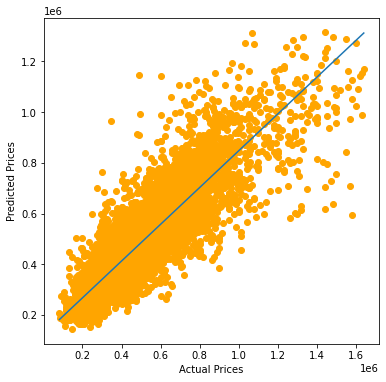

In [307]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y_test,predictions, color="orange")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

Even by dropping outliers our accuracy is lower than the original run, we will try cleaning highly correlated fields out of this new data

#### KNN

In [294]:
knn_model = KNeighborsRegressor(n_neighbors= 11) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)

In [295]:
R2 = r2_score(y_test,predictions)
R2

0.7680453820088595

In [296]:
MSE = mean_squared_error(y_test,predictions)
MSE

12832299409.364433

In [297]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

113279.73962436723

In [298]:
MAE = mean_absolute_error(y_test, predictions)
MAE

74861.01535327669

Our KNN in this case has a slightly better accuracy than the linear regression model, 61% against 59%

### Fourth Try: less data, more accuracy?

We will do some try outs with only a few columns that we consider relevant to see if with less information we namage to get more accuracy

In [299]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,3,1.0,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,64
2,2,1.0,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,82
3,4,3.0,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,50
4,3,2.0,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,28


We will run 3 different options (all including `price` obviously), using: `bedrooms` & `sqft_lot15` / `floors`, `condition`& `zipcode` /  `bedrooms`, `zipcode`& `sqft_lot15`

#### `floors`, `condition` & `zipcode`

In [300]:
fourthdf = df.copy()

In [301]:
fourthdf.drop(['waterfront', 'sqft_above', 'sqft_basement', 'condition',
                  'zipcode', 'grade', 'sqft_living15', 'bedrooms', 'bathrooms'], axis = 1, inplace = True)

In [302]:
fourthdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   floors      21597 non-null  object 
 1   view        21597 non-null  object 
 2   lat         21597 non-null  float64
 3   long        21597 non-null  float64
 4   sqft_lot15  21597 non-null  int64  
 5   price       21597 non-null  int64  
 6   house_age   21597 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.2+ MB


#### GetDummies

In [303]:
# using categorical columns
Xcat = fourthdf.select_dtypes(include = object)

In [304]:
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### All numericals

#### StandardScaler

In [308]:
numericals = fourthdf._get_numeric_data()
Xnum = numericals.drop(columns=['price'])
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.35289428, -0.30569514, -0.26062671,  0.54467809],
       [ 1.16137624, -0.74628553, -0.18769961,  0.68085037],
       [ 1.28335513, -0.13514402, -0.17219022,  1.29362563],
       ...,
       [ 0.24761719, -0.6041596 , -0.39419807, -1.29364769],
       [-0.1847222 ,  1.03028865, -0.42059702, -1.12343234],
       [ 0.24545189, -0.6041596 , -0.41803046, -1.25960462]])

#### X & y

In [309]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [310]:
y = fourthdf['price']

In [311]:
y.shape

(21597,)

In [312]:
X.shape

(21597, 13)

#### Splitting data

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear regression

In [314]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [315]:
R2 = r2_score(y_test,predictions)
R2

0.35094562153406395

In [316]:
MSE = mean_squared_error(y_test,predictions)
MSE

88536133627.0767

In [317]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

297550.2203445272

In [318]:
MAE = mean_absolute_error(y_test, predictions)
MAE

178602.499921141

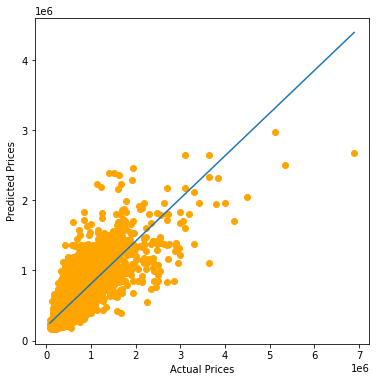

In [323]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y_test,predictions, color="orange")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

#### KNN

In [320]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)

In [321]:
R2 = r2_score(y_test,predictions)
R2

0.6678535450095826

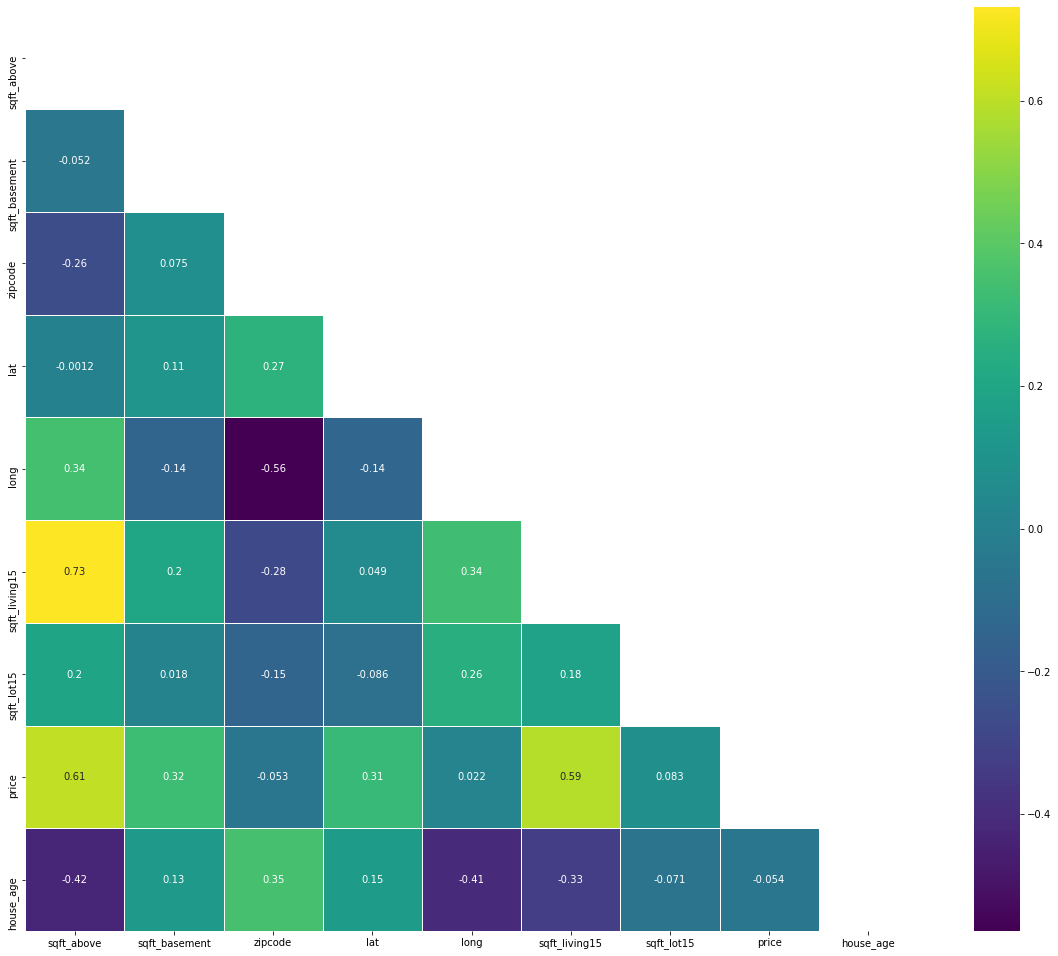

In [326]:
corr_data = df
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis");